# Import des packages nécessaires

In [392]:
import osmnx as ox
import networkx as nx # librairie pour traiter les graphes
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import pandas as pd
import folium
import folium.plugins
import os

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [393]:
print(ox.__version__)

1.1.2


In [394]:
ox.config(use_cache=True, log_console=True)

In [395]:
# le nom de la ville choisie: La Courneuve
lieu = {'city':'La Courneuve', 'state':'Seine-Saint-Denis', 'country':'France'}

# Récupération du réseau routier

In [396]:
graphe = ox.graph_from_place(lieu)

C:\Users\Lenovo P53s\anaconda3\envs\geopandas\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)
C:\Users\Lenovo P53s\anaconda3\envs\geopandas\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


In [397]:
type(graphe)

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


networkx.classes.multidigraph.MultiDiGraph

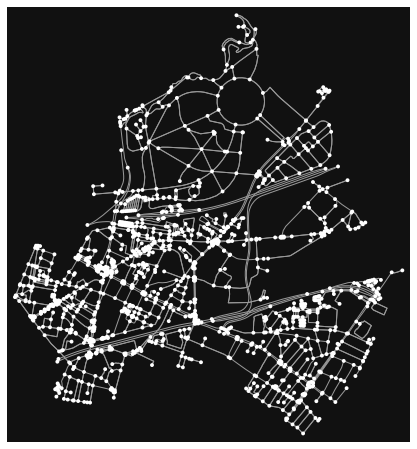

In [398]:
# on dessine les rues
fig, ax = ox.plot_graph(graphe)

In [399]:
# Polygone représentant la Courneuve
zonedI = ox.geocode_to_gdf(lieu)

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [400]:
type(zonedI)

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geopandas.geodataframe.GeoDataFrame

In [401]:
len(zonedI)

1

<AxesSubplot:>

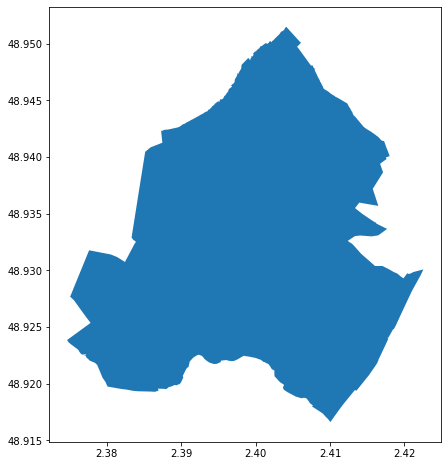

In [402]:
zonedI.plot(figsize=(8, 8))

# Récupération des bâtiments

In [403]:
batiments = ox.geometries_from_place(lieu, tags={'building':True})

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Lenovo P53s\anaconda3\envs\geopandas\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


In [404]:
len(batiments)

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6100

In [405]:
batiments.columns

Index(['man_made', 'geometry', 'level', 'name', 'wheelchair',
       'addr:housenumber', 'addr:postcode', 'amenity', 'brand',
       'opening_hours', 'operator', 'phone', 'source', 'nodes', 'building',
       'building:levels', 'layer', 'wall', 'roof:shape', 'leisure', 'office',
       'denomination', 'ref:FR:CEF', 'religion', 'wikidata', 'wikipedia',
       'school:FR', 'website', 'levels', 'owner', 'telecom', 'telecom:medium',
       'utility', 'sport', 'addr:city', 'addr:street', 'contact:email',
       'contact:phone', 'email', 'government', 'area', 'brand:wikidata',
       'brand:wikipedia', 'shop', 'contact:website', 'source:name',
       'preschool', 'information', 'tourism', 'ref:FR:CNC', 'screen',
       'addr:housename', 'description', 'cuisine', 'takeaway', 'level:ref',
       'alt_name', 'network', 'internet_access', 'ways', 'type'],
      dtype='object')

In [406]:
batiments.head(100)

man_made  \
element_type osmid               
way          47027446      NaN   
             63978301      NaN   
             63979193      NaN   
             63980179      NaN   
             63982779      NaN   
...                        ...   
             67174877      NaN   
             67174878      NaN   
             67174879      NaN   
             67174880      NaN   
             67174881      NaN   

                                                                geometry  \
element_type osmid                                                         
way          47027446  POLYGON ((2.37900 48.92728, 2.37919 48.92726, ...   
             63978301  POLYGON ((2.37733 48.92518, 2.37725 48.92514, ...   
             63979193  POLYGON ((2.37739 48.92520, 2.37740 48.92519, ...   
             63980179  POLYGON ((2.38422 48.93604, 2.38422 48.93611, ...   
             63982779  POLYGON ((2.38413 48.93622, 2.38413 48.93620, ...   
...                                                                  ...   
             67174877  POLYGON ((2.38188 48.92697, 2.38181 48.92691, ...   
             67174878  POLYGON ((2.41619 48.92337, 2.41628 48.92334, ...   
             67174879  POLYGON ((2.38520 48.92679, 2.38523 48.92690, ...   
             67174880  POLYGON ((2.41011 48.92173, 2.41013 48.92172, ...   
             67174881  POLYGON ((2.41174 48.92047, 2.41162 48.92051, ...   

                      level     name wheelchair addr:housenumber  \
element_type osmid                                                 
way          47027446     1  La Tour        NaN               23   
             63978301   NaN      NaN        NaN              NaN   
             63979193   NaN      NaN        NaN              NaN   
             63980179   NaN      NaN        NaN              NaN   
             63982779   NaN      NaN        NaN              NaN   
...                     ...      ...        ...              ...   
             67174877   NaN      NaN        NaN              NaN   
             67174878   NaN      NaN        NaN              NaN   
             67174879   NaN      NaN        NaN              NaN   
             67174880   NaN      NaN        NaN              NaN   
             67174881   NaN      NaN        NaN              NaN   

                      addr:postcode amenity brand opening_hours  ...  \
element_type osmid                                               ...   
way          47027446           NaN     NaN   NaN           NaN  ...   
             63978301           NaN     NaN   NaN           NaN  ...   
             63979193           NaN     NaN   NaN           NaN  ...   
             63980179           NaN     NaN   NaN           NaN  ...   
             63982779           NaN     NaN   NaN           NaN  ...   
...                             ...     ...   ...           ...  ...   
             67174877           NaN     NaN   NaN           NaN  ...   
             67174878           NaN     NaN   NaN           NaN  ...   
             67174879           NaN     NaN   NaN           NaN  ...   
             67174880           NaN     NaN   NaN           NaN  ...   
             67174881           NaN     NaN   NaN           NaN  ...   

                      addr:housename description cuisine takeaway level:ref  \
element_type osmid                                                            
way          47027446            NaN         NaN     NaN      NaN       NaN   
             63978301            NaN         NaN     NaN      NaN       NaN   
             63979193            NaN         NaN     NaN      NaN       NaN   
             63980179            NaN         NaN     NaN      NaN       NaN   
             63982779            NaN         NaN     NaN      NaN       NaN   
...                              ...         ...     ...      ...       ...   
             67174877            NaN         NaN     NaN      NaN       NaN   
             67174878            NaN         NaN     NaN 

# Récupération des bâtiments publics

In [407]:
batiments_publics = ox.geometries_from_place(lieu, tags={'building': ['hospital', 'office', 'civic', 'university', 'school', 'retail', 'cathedral', 'church', 'government', 'train_station', 'college', 'staduim']})

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Lenovo P53s\anaconda3\envs\geopandas\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


In [408]:
len(batiments_publics)

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


21

In [409]:
batiments_publics

level                                 name wheelchair  \
element_type osmid                                                              
way          67175063     NaN                                  NaN        NaN   
             67175434     NaN                     Banque de France        NaN   
             67176048     NaN                                  NaN        NaN   
             67176094     NaN                  Église Saint-Lucien        NaN   
             67176166     NaN                                  NaN        NaN   
             67176322     NaN              Médiathèque John Lennon        NaN   
             67177553     NaN       Hôtel de ville de La Courneuve        NaN   
             67178638     NaN                                  NaN        NaN   
             67180733     NaN                             Franprix        NaN   
             67181143     NaN                                  NaN        NaN   
             67181260     NaN                                  NaN        NaN   
             67181873     NaN  Église Saint-Yves-des-Quatre-Routes        NaN   
             67182075     NaN                                  NaN        NaN   
             67182604     NaN                                  NaN        NaN   
             67185731     NaN                                  NaN        NaN   
             67222191     NaN                  Chapelle L'Emmanuel        NaN   
             547063482    NaN                 Dugny - La Courneuve        yes   
             696389586    NaN                                  NaN        NaN   
             1008924191     0   Gare de La Courneuve-Aubervilliers        yes   
             1009564652   NaN   Gare de La Courneuve-Aubervilliers        yes   
relation     11608050     NaN                                  NaN        NaN   

                                                                  geometry  \
element_type osmid                                                           
way          67175063    POLYGON ((2.41201 48.92233, 2.41186 48.92240, ...   
             67175434    POLYGON ((2.39265 48.92461, 2.39272 48.92442, ...   
             67176048    POLYGON ((2.40913 48.91914, 2.40925 48.91908, ...   
             67176094    POLYGON ((2.38760 48.92948, 2.38757 48.92949, ...   
             67176166    POLYGON ((2.41739 48.92653, 2.41740 48.92654, ...   
             67176322    POLYGON ((2.37733 48.92656, 2.37742 48.92655, ...   
             67177553    POLYGON ((2.38925 48.92674, 2.38935 48.92671, ...   
             67178638    POLYGON ((2.41530 48.92536, 2.41530 48.92536, ...   
             67180733    POLYGON ((2.39345 48.92816, 2.39331 48.92840, ...   
             67181143    POLYGON ((2.38113 48.92813, 2.38105 48.92814, ...   
             67181260    POLYGON ((2.41508 48.92516, 2.41511 48.92514, ...   
             67181873    POLYGON ((2.41247 48.91975, 2.41247 48.91975, ...   
             67182075    POLYGON ((2.41078 48.92119, 2.41081 48.92123, ...   
             67182604    POLYGON ((2.41739 48.92653, 2.41738 48.92653, ...   
             67185731    POLYGON ((2.41550 48.92473, 2.41580 48.92500, ...   
             67222191    POLYGON ((2.37887 48.92582, 2.37888 48.92582, ...   
             547063482   POLYGON ((2.41142 48.94396, 2.41131 48.94390, ...   
             696389586   POLYGON ((2.39560 48.92501, 2.39594 48.92506, ...   
             1008924191  POLYGON ((2.38451 48.92388, 2.38455 48.92390, ...   
             1009564652  POLYGON ((2.38459 48.92422, 2.38462 48.92423, ...   
relation     11608050    POLYGON ((2.39476 48.92492, 2.39508 48.92409, ...   

                                                                    source  \
element_type osmid                                                           
way          67175063    extraction vectorielle v1 cadastre-dgi-fr sour...   
             67175434    cadastre-dgi-fr source : Direction Générale de...   
             67176048    extraction vectorielle v1 ca

In [410]:
# récupération du réseau routier sous forme d'un dataframe
nodes, edges = ox.graph_to_gdfs(graphe)

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [411]:
nodes.head()

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y         x  street_count            highway  ref  \
osmid                                                                 
15088601  48.928379  2.412891             3                NaN  NaN   
18683545  48.922584  2.380163             3                NaN  NaN   
18683571  48.925795  2.398846             3  motorway_junction  NaN   
25282258  48.934173  2.394652             3                NaN  NaN   
87567505  48.927603  2.418959             3  motorway_junction   12   

                          geometry  
osmid                               
15088601  POINT (2.41289 48.92838)  
18683545  POINT (2.38016 48.92258)  
18683571  POINT (2.39885 48.92579)  
25282258  POINT (2.39465 48.93417)  
87567505  POINT (2.41896 48.92760)

In [412]:
edges.head()

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid  \
u        v         key                                                      
15088601 87567515  0                                             10344024   
18683545 18683571  0    [19729792, 10345993, 522881738, 10345994, 4472...   
18683571 133215835 0    [14032449, 39166535, 47028554, 47028555, 14032...   
         87567521  0                                [447266795, 10343229]   
25282258 133215835 0                                             10344563   

                        oneway lanes   ref   highway  maxspeed    length  \
u        v         key                                                     
15088601 87567515  0      True     4  A 86  motorway        90   205.426   
18683545 18683571  0      True     4  A 86  motorway        90  1413.630   
18683571 133215835 0      True     2  A 16  motorway  [50, 70]  2120.518   
         87567521  0      True     3  A 86  motorway        90   521.007   
25282258 133215835 0      True     3   A 1  motorway        90  1470.326   

                         bridge                    name tunnel  \
u        v         key                                           
15088601 87567515  0        NaN                     NaN    NaN   
18683545 18683571  0    covered  Tunnel de la Courneuve    yes   
18683571 133215835 0        yes                     NaN    NaN   
         87567521  0        NaN                     NaN    NaN   
25282258 133215835 0        NaN       Autoroute du Nord    NaN   

                                                                 geometry  \
u        v         key                                                      
15088601 87567515  0      LINESTRING (2.41289 48.92838, 2.41016 48.92793)   
18683545 18683571  0    LINESTRING (2.38016 48.92258, 2.38072 48.92275...   
18683571 133215835 0    LINESTRING (2.39885 48.92579, 2.39907 48.92579...   
         87567521  0    LINESTRING (2.39885 48.92579, 2.39971 48.92593...   
25282258 133215835 0    LINESTRING (2.39465 48.93417, 2.39596 48.93428...   

                       junction access service width  
u        v         key                                
15088601 87567515  0        NaN    NaN     NaN   NaN  
18683545 18683571  0        NaN    NaN     NaN   NaN  
18683571 133215835 0        NaN    NaN     NaN   NaN  
         87567521  0        NaN    NaN     NaN   NaN  
25282258 133215835 0        NaN    NaN     NaN   NaN

# Représentation static des données récupérées

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

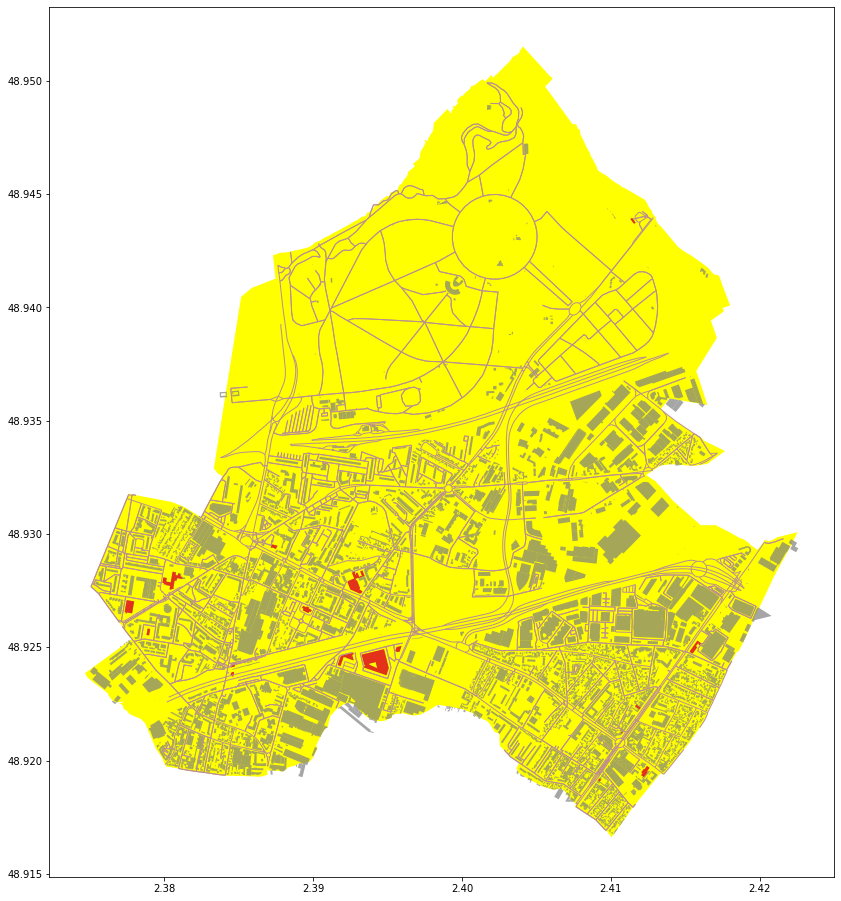

In [413]:
fig, ax = plt.subplots(figsize=(20,16))
# notre aire d'intérêt
zonedI.plot(ax=ax, facecolor='yellow')
# les arêtes du réseau routier
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
# les batiments
batiments.plot(ax=ax, facecolor='gray', alpha=0.7)
# les bâtiments publics
batiments_publics.plot(ax=ax, color='red', alpha=0.7, markersize=10)

# Reprojection des différentes couches

In [414]:
from pyproj import CRS
# régler la projectio
projection = CRS.from_epsg(2154)

# reprojeter les différentes couches
zonedI_proj = zonedI.to_crs(projection)
edges_proj = edges.to_crs(projection)
batiments_proj = batiments.to_crs(projection)
batiments_publics_proj = batiments_publics.to_crs(projection)

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

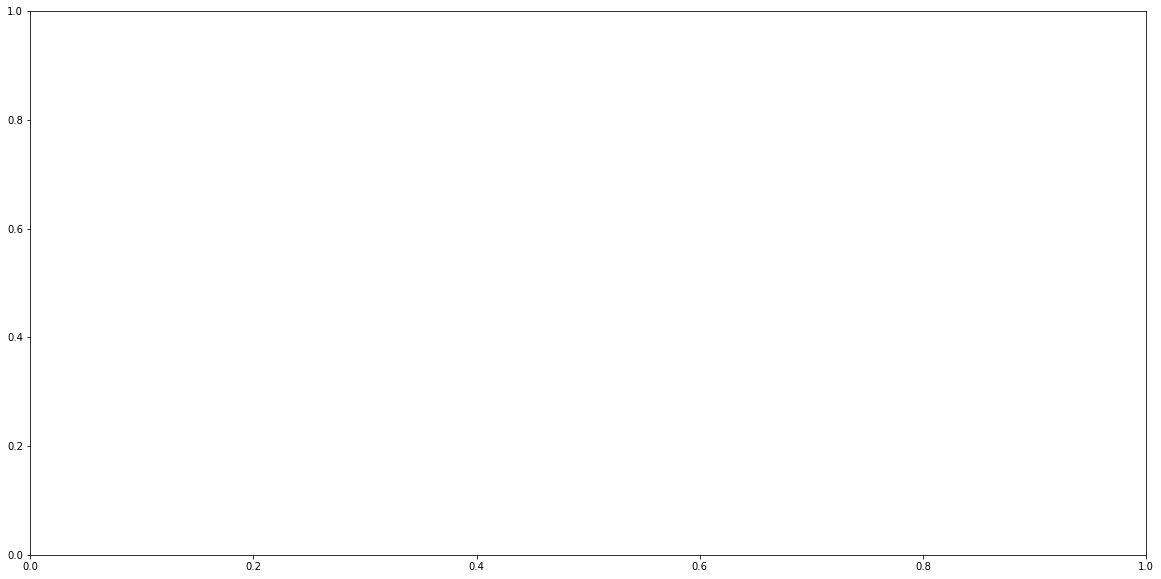

In [415]:
fig1, ax1 = plt.subplots(figsize=(20,10))
# notre aire d'intérêt
zonedI_proj.plot(ax=ax, facecolor='orange')
# les arêtes du réseau routier
edges_proj.plot(ax=ax, linewidth=1, edgecolor='dimgray')
# les batiments
batiments_proj.plot(ax=ax, facecolor='silver', alpha=0.7)
# les restaurants
batiments_publics_proj.plot(ax=ax, color='red', alpha=0.7, markersize=16)

In [416]:
batiments_publics.columns

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['level', 'name', 'wheelchair', 'geometry', 'source', 'nodes',
       'building', 'building:levels', 'roof:shape', 'office', 'amenity',
       'denomination', 'ref:FR:CEF', 'religion', 'wikidata', 'wikipedia',
       'addr:city', 'addr:postcode', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'shop', 'source:name', 'wall', 'alt_name', 'network',
       'operator', 'internet_access', 'ways', 'type'],
      dtype='object')

# Filtre sur le nombre de colonnes à récupérer dans chacunes des données

In [417]:
zonedI

geometry  bbox_north  bbox_south  \
0  POLYGON ((2.37467 48.92386, 2.37474 48.92377, ...   48.951515   48.916617   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat       lon  \
0   2.422535   2.374671  282045243  relation  138211  48.926724  2.389612   

                                        display_name     class  \
0  La Courneuve, Saint-Denis, Seine-Saint-Denis, ...  boundary   

             type  importance  
0  administrative    1.108461

In [418]:
batiments_publics

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


level                                 name wheelchair  \
element_type osmid                                                              
way          67175063     NaN                                  NaN        NaN   
             67175434     NaN                     Banque de France        NaN   
             67176048     NaN                                  NaN        NaN   
             67176094     NaN                  Église Saint-Lucien        NaN   
             67176166     NaN                                  NaN        NaN   
             67176322     NaN              Médiathèque John Lennon        NaN   
             67177553     NaN       Hôtel de ville de La Courneuve        NaN   
             67178638     NaN                                  NaN        NaN   
             67180733     NaN                             Franprix        NaN   
             67181143     NaN                                  NaN        NaN   
             67181260     NaN                                  NaN        NaN   
             67181873     NaN  Église Saint-Yves-des-Quatre-Routes        NaN   
             67182075     NaN                                  NaN        NaN   
             67182604     NaN                                  NaN        NaN   
             67185731     NaN                                  NaN        NaN   
             67222191     NaN                  Chapelle L'Emmanuel        NaN   
             547063482    NaN                 Dugny - La Courneuve        yes   
             696389586    NaN                                  NaN        NaN   
             1008924191     0   Gare de La Courneuve-Aubervilliers        yes   
             1009564652   NaN   Gare de La Courneuve-Aubervilliers        yes   
relation     11608050     NaN                                  NaN        NaN   

                                                                  geometry  \
element_type osmid                                                           
way          67175063    POLYGON ((2.41201 48.92233, 2.41186 48.92240, ...   
             67175434    POLYGON ((2.39265 48.92461, 2.39272 48.92442, ...   
             67176048    POLYGON ((2.40913 48.91914, 2.40925 48.91908, ...   
             67176094    POLYGON ((2.38760 48.92948, 2.38757 48.92949, ...   
             67176166    POLYGON ((2.41739 48.92653, 2.41740 48.92654, ...   
             67176322    POLYGON ((2.37733 48.92656, 2.37742 48.92655, ...   
             67177553    POLYGON ((2.38925 48.92674, 2.38935 48.92671, ...   
             67178638    POLYGON ((2.41530 48.92536, 2.41530 48.92536, ...   
             67180733    POLYGON ((2.39345 48.92816, 2.39331 48.92840, ...   
             67181143    POLYGON ((2.38113 48.92813, 2.38105 48.92814, ...   
             67181260    POLYGON ((2.41508 48.92516, 2.41511 48.92514, ...   
             67181873    POLYGON ((2.41247 48.91975, 2.41247 48.91975, ...   
             67182075    POLYGON ((2.41078 48.92119, 2.41081 48.92123, ...   
             67182604    POLYGON ((2.41739 48.92653, 2.41738 48.92653, ...   
             67185731    POLYGON ((2.41550 48.92473, 2.41580 48.92500, ...   
             67222191    POLYGON ((2.37887 48.92582, 2.37888 48.92582, ...   
             547063482   POLYGON ((2.41142 48.94396, 2.41131 48.94390, ...   
             696389586   POLYGON ((2.39560 48.92501, 2.39594 48.92506, ...   
             1008924191  POLYGON ((2.38451 48.92388, 2.38455 48.92390, ...   
             1009564652  POLYGON ((2.38459 48.92422, 2.38462 48.92423, ...   
relation     11608050    POLYGON ((2.39476 48.92492, 2.39508 48.92409, ...   

                                                                    source  \
element_type osmid                                                           
way          67175063    extraction vectorielle v1 cadastre-dgi-fr sour...   
             67175434    cadastre-dgi-fr source : Direction Générale de...   
             67176048    extraction vectorielle v1 ca

In [419]:
batiments_publics = batiments_publics[['name', 'geometry']]
batiments = batiments[['name', 'geometry']]
edges = edges[['name', 'geometry']]
zonedI = zonedI[['display_name', 'geometry']]

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [420]:
batiments_publics

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  \
element_type osmid                                             
way          67175063                                    NaN   
             67175434                       Banque de France   
             67176048                                    NaN   
             67176094                    Église Saint-Lucien   
             67176166                                    NaN   
             67176322                Médiathèque John Lennon   
             67177553         Hôtel de ville de La Courneuve   
             67178638                                    NaN   
             67180733                               Franprix   
             67181143                                    NaN   
             67181260                                    NaN   
             67181873    Église Saint-Yves-des-Quatre-Routes   
             67182075                                    NaN   
             67182604                                    NaN   
             67185731                                    NaN   
             67222191                    Chapelle L'Emmanuel   
             547063482                  Dugny - La Courneuve   
             696389586                                   NaN   
             1008924191   Gare de La Courneuve-Aubervilliers   
             1009564652   Gare de La Courneuve-Aubervilliers   
relation     11608050                                    NaN   

                                                                  geometry  
element_type osmid                                                          
way          67175063    POLYGON ((2.41201 48.92233, 2.41186 48.92240, ...  
             67175434    POLYGON ((2.39265 48.92461, 2.39272 48.92442, ...  
             67176048    POLYGON ((2.40913 48.91914, 2.40925 48.91908, ...  
             67176094    POLYGON ((2.38760 48.92948, 2.38757 48.92949, ...  
             67176166    POLYGON ((2.41739 48.92653, 2.41740 48.92654, ...  
             67176322    POLYGON ((2.37733 48.92656, 2.37742 48.92655, ...  
             67177553    POLYGON ((2.38925 48.92674, 2.38935 48.92671, ...  
             67178638    POLYGON ((2.41530 48.92536, 2.41530 48.92536, ...  
             67180733    POLYGON ((2.39345 48.92816, 2.39331 48.92840, ...  
             67181143    POLYGON ((2.38113 48.92813, 2.38105 48.92814, ...  
             67181260    POLYGON ((2.41508 48.92516, 2.41511 48.92514, ...  
             67181873    POLYGON ((2.41247 48.91975, 2.41247 48.91975, ...  
             67182075    POLYGON ((2.41078 48.92119, 2.41081 48.92123, ...  
             67182604    POLYGON ((2.41739 48.92653, 2.41738 48.92653, ...  
             67185731    POLYGON ((2.41550 48.92473, 2.41580 48.92500, ...  
             67222191    POLYGON ((2.37887 48.92582, 2.37888 48.92582, ...  
             547063482   POLYGON ((2.41142 48.94396, 2.41131 48.94390, ...  
             696389586   POLYGON ((2.39560 48.92501, 2.39594 48.92506, ...  
             1008924191  POLYGON ((2.38451 48.92388, 2.38455 48.92390, ...  
             1009564652  POLYGON ((2.38459 48.92422, 2.38462 48.92423, ...  
relation     11608050    POLYGON ((2.39476 48.92492, 2.39508 48.92409, ...

### Export des données obtenues

In [421]:
zonedI.to_file(filename='./data/data_exo2/limite_admin_la_courneuve', driver='GeoJSON')

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [422]:
batiments.to_file(filename='./data/data_exo2/batiments', driver='GeoJSON')

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [423]:
batiments_publics.to_file(filename='./data/data_exo2/batiments_publics', driver='GeoJSON')

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [424]:
# Carte intéractive mettant en valeur les bâtiments publics

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [425]:
# carte centrée sur la commune de La Courneuve
carte = folium.Map(location=[48.9350, 2.4066],
                   tiles="",
                   zoom_start=14)

In [426]:
carte

In [427]:
cartodb = folium.TileLayer('cartodbpositron', name='Cartodb')
stamen = folium.TileLayer('Stamen Terrain', name='Stamen')

In [428]:
cartodb = folium.TileLayer('cartodbpositron', name='Cartodb')
stamen = folium.TileLayer('Stamen Terrain', name='Stamen')

In [429]:
# on ajoute les deux fonds cartos à la carte
cartodb.add_to(carte)
stamen.add_to(carte)

carte

In [430]:
# Récupération des fichiers GeoJSON générés et ajout à la carte

In [431]:
Courneuve = folium.GeoJson(
    data="./data/data_exo2/limite_admin_la_courneuve",
    style_function=lambda feature: {
        'fillColor': 'NA',
        'color': 'black',
        'weight': 1,
        'dashArray': '2'
    },
    name="limite administrative",
).add_to(carte)

In [432]:
Courneuve_batiments = folium.GeoJson(
    data="./data/data_exo2/batiments",
    style_function=lambda feature: {
        'fillColor': 'green',
        'color': 'green',
        'weight': 0.5,
        'dashArray': '2'
    },
    name="Bâtiments",
).add_to(carte)

In [433]:
Courneuve_bat_publics= folium.GeoJson(
    data="./data/data_exo2/batiments_publics",
    style_function=lambda feature: {
        'fillColor': 'red',
        'color': 'red',
        'weight': 1,
        'dashArray': '2'
    },
    name="Bâtiments publics",
).add_to(carte)

carte

In [434]:
### Ajout des objets de contrôles et de dessin

In [435]:
folium.LayerControl().add_to(carte)

In [436]:
monDraw = folium.plugins.Draw(export=True,
                              filename='my_data.geojson',
                              position='topleft',
                              draw_options={'polyline': {'allowIntersection': False}},
                              edit_options={'poly': {'allowIntersection': False}}
                              )

In [437]:
monDraw.add_to(carte)

In [438]:
### Export de la carte au format html

carte.save("./result/carte_batiment_public.html")

In [439]:
# Calcul des plus courtes distances

### Point de départ : la Mairie de la courneuve

# on récupère les coordonnées x et y de l'origine de Point(x, y) vers tuple
orig_xy = ( 48.9267236, 2.3896123)
print(orig_xy)

In [440]:
### Point d'arrivée : Stade Nelson Mandela

(48.9297267, 2.4021112)


destination_xy = (48.9297267, 2.4021112)
print(destination_xy)

In [441]:
# on récupère le nœud de départ
orig_node = ox.get_nearest_node(graphe, orig_xy, method='euclidean')

485961047


In [442]:
print(orig_node)

C:\Users\Lenovo P53s\anaconda3\envs\geopandas\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [443]:
# on récupère le nœud de destination
dest_node = ox.get_nearest_node(graphe, destination_xy, method='euclidean')

6504485107


C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [444]:
print(dest_node)

y                                   48.92684
x                                   2.389713
street_count                               3
highway                                  NaN
ref                                      NaN
geometry        POINT (2.3897131 48.9268405)
Name: 485961047, dtype: object

In [445]:
# la ligne de la gdf du sommet le plus près de l'origine
o_closest = nodes.loc[orig_node]
o_closest

y                                  48.929906
x                                   2.400289
street_count                               1
highway                                  NaN
ref                                      NaN
geometry        POINT (2.4002889 48.9299058)
Name: 6504485107, dtype: object

In [446]:
# la ligne de la gdf du sommet le plus près de l'origine
d_closest = nodes.loc[dest_node]
d_closest

y         x  street_count  highway  ref  \
485961047   48.926840  2.389713             3      NaN  NaN   
6504485107  48.929906  2.400289             1      NaN  NaN   

                            geometry  
485961047   POINT (2.38971 48.92684)  
6504485107  POINT (2.40029 48.92991)

In [447]:
# On en profite pour créer une geodataframe stockant tout cela
od_nodes = gpd.GeoDataFrame([o_closest, d_closest], geometry='geometry', crs=nodes.crs)
od_nodes

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [448]:
## On calcule maintenant le plus court chemin entre la Mairie de La Courneuve et le stade Nelson Mandela

[485961047, 7128388798, 485923853, 485599826, 485598641, 3558027634, 346862424, 346862549, 485961322, 6782250537, 5303751203, 480470732, 485961844, 480470733, 6782250526, 668043714, 469140215, 668043574, 469139564, 469139539, 6504485107]


# calcul du plus court chemin
court_chemin = nx.shortest_path(G=graphe, source=orig_node, target=dest_node, weight='length')
print(court_chemin)

In [449]:
figRoute, axRoute = ox.plot_graph_route(graphe, court_chemin,  route_linewidth=6, node_size=6)

In [450]:
## Sauvegarde des données

y         x  street_count   highway  ref  \
osmid                                                          
485961047   48.926840  2.389713             3       NaN  NaN   
7128388798  48.926737  2.390082             3       NaN  NaN   
485923853   48.926711  2.390172             3       NaN  NaN   
485599826   48.926376  2.391280             4  crossing  NaN   
485598641   48.926068  2.392331             3       NaN  NaN   
3558027634  48.926829  2.392873             3       NaN  NaN   
346862424   48.927139  2.393111             4       NaN  NaN   
346862549   48.927259  2.393245             4       NaN  NaN   
485961322   48.927825  2.393829             3       NaN  NaN   
6782250537  48.928250  2.394279             3       NaN  NaN   
5303751203  48.928601  2.394654             3       NaN  NaN   
480470732   48.928936  2.395010             3       NaN  NaN   
485961844   48.929170  2.395255             3       NaN  NaN   
480470733   48.929361  2.395462             4       NaN  NaN   
6782250526  48.929266  2.395881             3       NaN  NaN   
668043714   48.929186  2.396558             4       NaN  NaN   
469140215   48.929175  2.396628             4       NaN  NaN   
668043574   48.929162  2.396698             4       NaN  NaN   
469139564   48.928594  2.398939             3       NaN  NaN   
469139539   48.929827  2.399726             4       NaN  NaN   
6504485107  48.929906  2.400289             1       NaN  NaN   

                            geometry  
osmid                                 
485961047   POINT (2.38971 48.92684)  
7128388798  POINT (2.39008 48.92674)  
485923853   POINT (2.39017 48.92671)  
485599826   POINT (2.39128 48.92638)  
485598641   POINT (2.39233 48.92607)  
3558027634  POINT (2.39287 48.92683)  
346862424   POINT (2.39311 48.92714)  
346862549   POINT (2.39324 48.92726)  
485961322   POINT (2.39383 48.92782)  
6782250537  POINT (2.39428 48.92825)  
5303751203  POINT (2.39465 48.92860)  
480470732   POINT (2.39501 48.92894)  
485961844   POINT (2.39525 48.92917)  
480470733   POINT (2.39546 48.92936)  
6782250526  POINT (2.39588 48.92927)  
668043714   POINT (2.39656 48.92919)  
469140215   POINT (2.39663 48.92918)  
668043574   POINT (2.39670 48.92916)  
469139564   POINT (2.39894 48.92859)  
469139539   POINT (2.39973 48.92983)  
6504485107  POINT (2.40029 48.92991)

route_nodes = nodes.loc[court_chemin]
route_nodes

In [451]:
# On peut donc créer une LineString avec Shapely
from shapely.geometry import LineString, Point

route_line = LineString(list(route_nodes.geometry.values))

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geometry
0  LINESTRING (2.38971 48.92684, 2.39008 48.92674...

In [452]:
# création de la gdf
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])
route_geom

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['y', 'x', 'street_count', 'highway', 'ref', 'geometry'], dtype='object')

In [453]:
route_nodes.columns

In [454]:
### Téléchargement des routes

C:\Users\Lenovo P53s\anaconda3\envs\geopandas\lib\site-packages\geopandas\array.py:524: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.representative_point(self.data), crs=self.crs)


route_test = ox.geometries_from_place(lieu, tags={'highway':True})

In [455]:
len(route_test)

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


highway  \
element_type osmid                         
node         18683571  motorway_junction   
             25282251          milestone   
             25282252          milestone   
             25282265          milestone   
             25282266          milestone   
...                                  ...   
relation     11150472         pedestrian   
             11842196         pedestrian   
             13517092            footway   
             13517478            footway   
             13517729            footway   

                                                                geometry  \
element_type osmid                                                         
node         18683571                           POINT (2.39885 48.92579)   
             25282251                           POINT (2.39766 48.93463)   
             25282252                           POINT (2.39770 48.93448)   
             25282265                           POINT (2.38401 48.93397)   
             25282266                           POINT (2.38401 48.93384)   
...                                                                  ...   
relation     11150472  POLYGON ((2.38397 48.92535, 2.38401 48.92534, ...   
             11842196  POLYGON ((2.38692 48.93287, 2.38690 48.93290, ...   
             13517092  POLYGON ((2.38389 48.92277, 2.38384 48.92278, ...   
             13517478  POLYGON ((2.38396 48.92330, 2.38391 48.92317, ...   
             13517729  POLYGON ((2.38450 48.92389, 2.38451 48.92388, ...   

                      distance nat_ref operator ref:highway        source  \
element_type osmid                                                          
node         18683571      NaN     NaN      NaN         NaN           NaN   
             25282251        6  93PR6G    DIRIF         A 1  data.gouv.fr   
             25282252        6  93PR6D    DIRIF         A 1  data.gouv.fr   
             25282265        5  93PR5G    DIRIF         A 1  data.gouv.fr   
             25282266        5  93PR5D    DIRIF         A 1  data.gouv.fr   
...                        ...     ...      ...         ...           ...   
relation     11150472      NaN     NaN      NaN         NaN           NaN   
             11842196      NaN     NaN      NaN         NaN           NaN   
             13517092      NaN     NaN      NaN         NaN           NaN   
             13517478      NaN     NaN      NaN         NaN           NaN   
             13517729      NaN     NaN      NaN         NaN           NaN   

                       ref exit_to crossing  ... toilets conveying  \
element_type osmid                           ...                     
node         18683571  NaN     NaN      NaN  ...     NaN       NaN   
             25282251  NaN     NaN      NaN  ...     NaN       NaN   
             25282252  NaN     NaN      NaN  ...     NaN       NaN   
             25282265  NaN     NaN      NaN  ...     NaN       NaN   
             25282266  NaN     NaN      NaN  ...     NaN       NaN   
...                    ...     ...      ...  ...     ...       ...   
relation     11150472  NaN     NaN      NaN  ...     NaN       NaN   
             11842196  NaN     NaN      NaN  ...     NaN       NaN   
             13517092  NaN     NaN      NaN  ...     NaN       NaN   
             13517478  NaN     NaN      NaN  ...     NaN       NaN   
             13517729  NaN     NaN      NaN  ...     NaN       NaN   

                      lanes:backward lanes:forward leisure lane_markings  \
element_type osmid                                                         
node         18683571            NaN           NaN     NaN           NaN   
             25282251            NaN           NaN     NaN           NaN   
             25282252            NaN           NaN     NaN           NaN   
             25282265            NaN           NaN     NaN           NaN   
             25282266            NaN           NaN     NaN           NaN   
...                       

In [456]:
route_test

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


highway  \
element_type osmid                         
node         18683571  motorway_junction   
             25282251          milestone   
             25282252          milestone   
             25282265          milestone   
             25282266          milestone   
...                                  ...   
relation     11150472         pedestrian   
             11842196         pedestrian   
             13517092            footway   
             13517478            footway   
             13517729            footway   

                                                                geometry  
element_type osmid                                                        
node         18683571                           POINT (2.39885 48.92579)  
             25282251                           POINT (2.39766 48.93463)  
             25282252                           POINT (2.39770 48.93448)  
             25282265                           POINT (2.38401 48.93397)  
             25282266                           POINT (2.38401 48.93384)  
...                                                                  ...  
relation     11150472  POLYGON ((2.38397 48.92535, 2.38401 48.92534, ...  
             11842196  POLYGON ((2.38692 48.93287, 2.38690 48.93290, ...  
             13517092  POLYGON ((2.38389 48.92277, 2.38384 48.92278, ...  
             13517478  POLYGON ((2.38396 48.92330, 2.38391 48.92317, ...  
             13517729  POLYGON ((2.38450 48.92389, 2.38451 48.92388, ...  

[1835 rows x 2 columns]

In [457]:
route_test = route_test[['highway', 'geometry']]
route_test

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [458]:
milestone = route_test[route_test['highway'] == 'milestone']
motorway_junction = route_test[route_test['highway'] == 'motorway_junction']
crossing = route_test[route_test['highway'] == 'crossing']
speed_camera = route_test[route_test['highway'] == 'speed_camera']
traffic_signals = route_test[route_test['highway'] == 'traffic_signals']
bus_stop = route_test[route_test['highway'] == 'bus_stop']
elevator = route_test[route_test['highway'] == 'elevator']
footway = route_test[route_test['highway'] == 'footway']
service = route_test[route_test['highway'] == 'service']
pedestrian = route_test[route_test['highway'] == 'pedestrian']
steps = route_test[route_test['highway'] == 'steps']
secondary = route_test[route_test['highway'] == 'secondary']
residential = route_test[route_test['highway'] == 'residential']

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


highway  \
element_type osmid                 
way          32559453    footway   
             32559455    footway   
             32559465    footway   
             32559472    footway   
             32559478    footway   
...                          ...   
             1009583278  footway   
             1009621511  footway   
relation     13517092    footway   
             13517478    footway   
             13517729    footway   

                                                                  geometry  
element_type osmid                                                          
way          32559453    LINESTRING (2.39874 48.93760, 2.39783 48.93762...  
             32559455    LINESTRING (2.39596 48.93663, 2.39625 48.93668...  
             32559465    LINESTRING (2.40213 48.93907, 2.40056 48.93916...  
             32559472    LINESTRING (2.39874 48.93760, 2.39906 48.93779...  
             32559478      LINESTRING (2.40135 48.94074, 2.40096 48.94081)  
...                                                                    ...  
             1009583278  LINESTRING (2.38443 48.92513, 2.38437 48.92500...  
             1009621511  LINESTRING (2.38607 48.92449, 2.38608 48.92446...  
relation     13517092    POLYGON ((2.38389 48.92277, 2.38384 48.92278, ...  
             13517478    POLYGON ((2.38396 48.92330, 2.38391 48.92317, ...  
             13517729    POLYGON ((2.38450 48.92389, 2.38451 48.92388, ...  

[307 rows x 2 columns]

In [459]:
footway = route_test[route_test['highway'] == 'footway']
footway

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


footway.to_file(filename='./data/data_exo2/footway', driver='GeoJSON')

In [460]:
service = route_test[route_test['highway'] == 'service']
service

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [461]:
service.to_file(filename='./data/data_exo2/service', driver='GeoJSON')

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


highway  \
element_type osmid                
way          217955612    steps   
             217955613    steps   
             421283691    steps   
             421283694    steps   
             421283695    steps   
             421283697    steps   
             421283698    steps   
             421283699    steps   
             421283700    steps   
             421283702    steps   
             421283703    steps   
             421283704    steps   
             431586457    steps   
             547063485    steps   
             547063493    steps   
             547063495    steps   
             709905115    steps   
             723073803    steps   
             739177108    steps   
             739177109    steps   
             739177110    steps   
             739177119    steps   
             739177123    steps   
             902195040    steps   
             906035344    steps   
             906040275    steps   
             906040276    steps   
             906040278    steps   
             1008882839   steps   
             1009574823   steps   
             1009574828   steps   
             1009574829   steps   
             1009574830   steps   
             1009574831   steps   
             1009583276   steps   
             1009583280   steps   
             1009621507   steps   

                                                                  geometry  
element_type osmid                                                          
way          217955612     LINESTRING (2.40919 48.91938, 2.40927 48.91945)  
             217955613     LINESTRING (2.40907 48.91943, 2.40915 48.91951)  
             421283691     LINESTRING (2.38461 48.92403, 2.38473 48.92405)  
             421283694     LINESTRING (2.38456 48.92414, 2.38473 48.92417)  
             421283695   LINESTRING (2.38450 48.92389, 2.38453 48.92391...  
             421283697     LINESTRING (2.38574 48.92423, 2.38562 48.92421)  
             421283698     LINESTRING (2.38452 48.92404, 2.38457 48.92405)  
             421283699     LINESTRING (2.38565 48.92441, 2.38559 48.92440)  
             421283700     LINESTRING (2.38571 48.92442, 2.38577 48.92443)  
             421283702     LINESTRING (2.38579 48.92410, 2.38567 48.92408)  
             421283703     LINESTRING (2.38569 48.92436, 2.38556 48.92433)  
             421283704     LINESTRING (2.38453 48.92401, 2.38458 48.92402)  
             431586457     LINESTRING (2.39124 48.92425, 2.39144 48.92444)  
             547063485     LINESTRING (2.41105 48.94385, 2.41100 48.94390)  
             547063493     LINESTRING (2.41125 48.94394, 2.41119 48.94399)  
             547063495     LINESTRING (2.41106 48.94410, 2.41112 48.94405)  
             709905115     LINESTRING (2.41213 48.94341, 2.41192 48.94365)  
             723073803   LINESTRING (2.41755 48.93369, 2.41758 48.93367...  
             739177108     LINESTRING (2.41058 48.92070, 2.41068 48.92066)  
             739177109     LINESTRING (2.41072 48.92082, 2.41081 48.92078)  
             739177110     LINESTRING (2.41071 48.92080, 2.41079 48.92077)  
             739177119     LINESTRING (2.41057 48.92069, 2.41064 48.92065)  
             739177123     LINESTRING (2.41019 48.92081, 2.41019 48.92076)  
             902195040     LINESTRING (2.39099 48.93308, 2.39102 48.93305)  
             906035344     LINESTRING (2.38799 48.92656, 2.38801 48.92659)  
             906040275     LINESTRING (2.38374 48.92434, 2.38367 48.92435)  
             906040276     LINESTRING (2.38412 48.92423, 2.38403 48.92422)  
             906040278     LINESTRING (2.38407 48.92431, 2.38411 48.92436)  
             1008882839    LINESTRING (2.38460 48.92420, 2.38463 48.92421)  
             1009574823    LINESTRING (2.38430 48.92332, 2.38429 48.92329)  
             1009574828    LINESTRING (2.38449 48.92336, 2.38451 48.92331)  
             1009574829    LINESTRING (2.38467 48.92339, 2.38473 48.92333)  
             1009574830    LINESTRING (2

In [462]:
steps = route_test[route_test['highway'] == 'steps']
steps

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [463]:
steps.to_file(filename='./data/data_exo2/steps', driver='GeoJSON')

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


highway  \
element_type osmid                  
way          14033809   secondary   
             14033811   secondary   
             14033812   secondary   
             14033814   secondary   
             19729785   secondary   
...                           ...   
             962612639  secondary   
             962612640  secondary   
             962616246  secondary   
             962616247  secondary   
             977376360  secondary   

                                                                 geometry  
element_type osmid                                                         
way          14033809   LINESTRING (2.40022 48.93287, 2.40057 48.93312...  
             14033811   LINESTRING (2.40312 48.93592, 2.40285 48.93551...  
             14033812   LINESTRING (2.40258 48.93509, 2.40228 48.93468...  
             14033814   LINESTRING (2.40281 48.93515, 2.40298 48.93542...  
             19729785     LINESTRING (2.41143 48.94276, 2.41158 48.94289)  
...                                                                   ...  
             962612639  LINESTRING (2.41686 48.93343, 2.41663 48.93337...  
             962612640    LINESTRING (2.41308 48.93283, 2.41282 48.93281)  
             962616246    LINESTRING (2.38595 48.92968, 2.38625 48.92977)  
             962616247  LINESTRING (2.38710 48.93012, 2.38792 48.93044...  
             977376360  LINESTRING (2.38366 48.92867, 2.38396 48.92879...  

[74 rows x 2 columns]

In [464]:
secondary = route_test[route_test['highway'] == 'secondary']
secondary

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [465]:
secondary.to_file(filename='./data/data_exo2/secondary', driver='GeoJSON')

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


highway  \
element_type osmid                     
way          19356242    residential   
             19361441    residential   
             19361443    residential   
             23163652    residential   
             23163653    residential   
...                              ...   
             884054314   residential   
             902194209   residential   
             902368066   residential   
             904605204   residential   
             1009583279  residential   

                                                                  geometry  
element_type osmid                                                          
way          19356242    LINESTRING (2.40777 48.91808, 2.40765 48.91811...  
             19361441    LINESTRING (2.39377 48.92025, 2.39372 48.92027...  
             19361443    LINESTRING (2.39112 48.92230, 2.39027 48.92255...  
             23163652    LINESTRING (2.38395 48.92311, 2.38369 48.92307...  
             23163653    LINESTRING (2.37698 48.92610, 2.37688 48.92619...  
...                                                                    ...  
             884054314   LINESTRING (2.39745 48.93113, 2.39754 48.93108...  
             902194209     LINESTRING (2.40043 48.93307, 2.40026 48.93315)  
             902368066   LINESTRING (2.38010 48.92887, 2.38004 48.92876...  
             904605204   LINESTRING (2.38977 48.92349, 2.38995 48.92360...  
             1009583279    LINESTRING (2.38369 48.92459, 2.38412 48.92439)  

[261 rows x 2 columns]

In [466]:
residential = route_test[route_test['highway'] == 'residential']
residential

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [467]:
residential.to_file(filename='./data/data_exo2/residential', driver='GeoJSON')

C:\Users\Lenovo P53s\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [468]:
# Carte intéractive mettant en valeur les différents types de réseau routier

In [469]:
# carte centrée sur la commune de La Courneuve
carte_des_routes = folium.Map(location=[48.9350, 2.4066],
                   tiles="",
                   zoom_start=14)

In [470]:
# on ajoute les deux fonds cartos à la carte
cartodb.add_to(carte_des_routes)
stamen.add_to(carte_des_routes)

In [471]:
Courneuve_limite = folium.GeoJson(
    data="./data/data_exo2/limite_admin_la_courneuve",
    style_function=lambda feature: {
        'fillColor': 'NA',
        'color': 'black',
        'weight': 1,
        'dashArray': '2'
    },
    name="limite administrative",
).add_to(carte_des_routes)

In [472]:
folium.GeoJson(
    data="./data/data_exo2/secondary",
    style_function=lambda feature: {
        'fileColor': 'red',
        'weight': 1,
        'color': 'red',
        'dashArray': '10.5'
    },
    name="secondary",
).add_to(carte_des_routes)

In [473]:
folium.GeoJson(
    data="./data/data_exo2/footway",
    style_function=lambda feature: {
        'fileColor': 'green',
        'weight': 1,
        'color': 'green',
        'dashArray': '10.5'
    },
    name="footway",
).add_to(carte_des_routes)

In [474]:
folium.GeoJson(
    data="./data/data_exo2/service",
    style_function=lambda feature: {
        'fileColor': 'orange',
        'weight': 1,
        'color': 'orange',
        'dashArray': '10.5'
    },
    name="service",
).add_to(carte_des_routes)

In [475]:
folium.GeoJson(
    data="./data/data_exo2/residential",
    style_function=lambda feature: {
        'fileColor': 'yellow',
        'weight': 1,
        'color': 'yellow',
        'dashArray': '10.5'
    },
    name="residential",
).add_to(carte_des_routes)

In [476]:
folium.GeoJson(
    data="./data/data_exo2/steps",
    style_function=lambda feature: {
        'fileColor': 'blue',
        'weight': 1,
        'color': 'blue',
        'dashArray': '10.5'
    },
    name="steps",
).add_to(carte_des_routes)

In [477]:
folium.LayerControl().add_to(carte_des_routes)

In [478]:
monDraw.add_to(carte_des_routes)

In [479]:
carte_des_routes

In [355]:
carte_des_routes

In [259]:
footway.to_file(filename='./data/data_exo2/footway', driver='GeoJSON')
service.to_file(filename='./data/data_exo2/service', driver='GeoJSON')
steps.to_file(filename='./data/data_exo2/steps', driver='GeoJSON')
secondary.to_file(filename='./data/data_exo2/secondary', driver='GeoJSON')
residential.to_file(filename='./data/data_exo2/residential', driver='GeoJSON')

NameError: name 'monDraw' is not defined

In [ ]:
# carte centrée sur la commune de La Courneuve
carte_des_routes = folium.Map(location=[48.9350, 2.4066],
                   tiles="",
                   zoom_start=14)

In [ ]:
# on ajoute les deux fonds cartos à la carte
cartodb.add_to(carte_des_routes)
stamen.add_to(carte_des_routes)

In [ ]:
Courneuve_limite = folium.GeoJson(
    data="./data/data_exo2/limite_admin_la_courneuve",
    style_function=lambda feature: {
        'fillColor': 'NA',
        'color': 'black',
        'weight': 1,
        'dashArray': '2'
    },
    name="limite administrative",
).add_to(carte_des_routes)

In [ ]:
folium.GeoJson(
    data="./data/data_exo2/secondary",
    style_function=lambda feature: {
        'fileColor': 'red',
        'weight': 1,
        'color': 'red',
        'dashArray': '10.5'
    },
    name="secondary",
).add_to(carte_des_routes)

In [ ]:
folium.GeoJson(
    data="./data/data_exo2/footway",
    style_function=lambda feature: {
        'fileColor': 'green',
        'weight': 1,
        'color': 'green',
        'dashArray': '10.5'
    },
    name="footway",
).add_to(carte_des_routes)

In [ ]:
folium.GeoJson(
    data="./data/data_exo2/service",
    style_function=lambda feature: {
        'fileColor': 'orange',
        'weight': 1,
        'color': 'orange',
        'dashArray': '10.5'
    },
    name="service",
).add_to(carte_des_routes)

In [ ]:
folium.GeoJson(
    data="./data/data_exo2/residential",
    style_function=lambda feature: {
        'fileColor': 'yellow',
        'weight': 1,
        'color': 'yellow',
        'dashArray': '10.5'
    },
    name="residential",
).add_to(carte_des_routes)

In [ ]:
folium.GeoJson(
    data="./data/data_exo2/steps",
    style_function=lambda feature: {
        'fileColor': 'blue',
        'weight': 1,
        'color': 'blue',
        'dashArray': '10.5'
    },
    name="steps",
).add_to(carte_des_routes)

In [ ]:
folium.LayerControl().add_to(carte_des_routes)
monDraw.add_to(carte_des_routes)

In [ ]:
carte_des_routes

In [ ]:
carte_des_routes.save("./result/carte_interactive_des_reseaux.html")